In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
from tensorflow.keras.datasets import mnist

# Loading Data

In [50]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
single_image = x_train[0]

In [53]:
single_image.shape

(28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

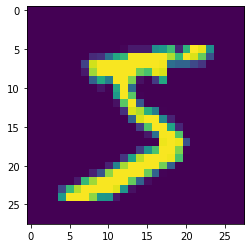

In [55]:
plt.imshow(single_image)

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Setting up target variable and scaling data

In [57]:
from tensorflow.keras.utils import to_categorical

In [58]:
y_train.shape

(60000,)

In [59]:
# one hot encoding
y_cat_test = to_categorical(y_test, num_classes=10)

In [60]:
# one hot encoding
y_cat_train = to_categorical(y_train, num_classes=10)

In [61]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
x_train = x_train/255

In [63]:
x_test = x_test/255

In [64]:
scaled_image = x_train[0]

In [65]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

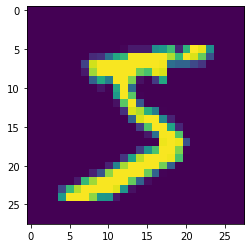

In [66]:
plt.imshow(scaled_image)

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_train = x_train.reshape(60000, 28, 28 ,1)

In [69]:
x_test = x_test.reshape(10000, 28, 28, 1)

# Creating Model

In [70]:
from tensorflow.keras.models import Sequential

In [71]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [72]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

# OUTPUT LAYER
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [75]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1385 - accuracy: 0.9590 - val_loss: 0.0622 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0402 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0426 - val_accuracy: 0.9865


# Evaluating Model

In [76]:
metrics = pd.DataFrame(model.history.history)

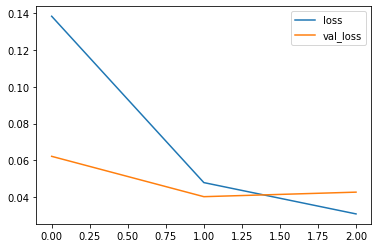

In [77]:
metrics[["loss", "val_loss"]].plot()

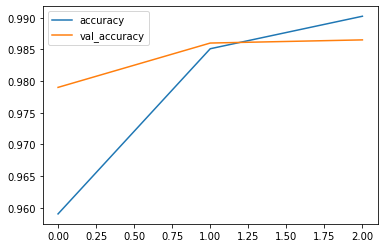

In [78]:
metrics[["accuracy", "val_accuracy"]].plot()

In [79]:
model.metrics_names

['loss', 'accuracy']

In [80]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.0426381379365921, 0.9865000247955322]

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [83]:
y_cat_test.shape

(10000, 10)

In [84]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [85]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [87]:
confusion_matrix(y_test, predictions)

array([[ 968,    0,    1,    1,    0,    1,    8,    0,    1,    0],
       [   0, 1129,    0,    2,    0,    0,    3,    0,    1,    0],
       [   3,    1, 1015,    2,    0,    0,    3,    6,    2,    0],
       [   0,    0,    0, 1007,    0,    0,    0,    1,    2,    0],
       [   0,    0,    0,    0,  972,    0,    5,    0,    1,    4],
       [   1,    0,    0,   21,    0,  864,    3,    0,    3,    0],
       [   1,    1,    0,    0,    1,    1,  950,    0,    4,    0],
       [   0,    1,    3,    3,    0,    0,    0, 1019,    1,    1],
       [   3,    0,    0,    1,    0,    0,    1,    4,  963,    2],
       [   1,    1,    0,   11,    5,    2,    1,    8,    2,  978]])

In [88]:
import seaborn as sns

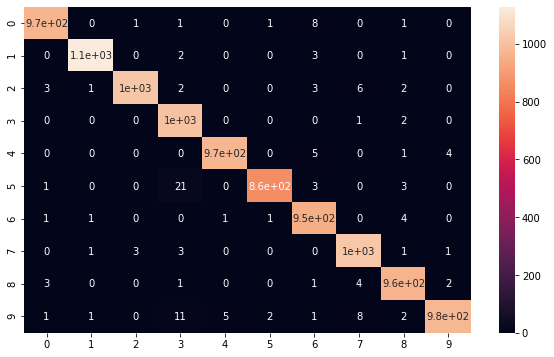

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [90]:
mynumber = x_test[0]

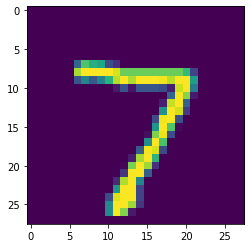

In [91]:
plt.imshow(mynumber.reshape(28,28))

In [92]:
np.argmax(model.predict(mynumber.reshape(1,28,28,1)), axis=-1)

array([7])